
# > O problema da mochila com Simulated Annealing
> Atividade de GCC128 - Inteligência Artificial


Aluno: Thiago Odilon de Almeida - 202021025

Para a resolução do problema da Mochila 0-1 optei por usar a linguagem python pela facilidade que tenho com a linguagem e também pela rápida implementação  de gráficos com a biblioteca matplotlib.

## Funcionamento do código e estratégias adotadas

Seguindo as orientações do projeto, o primeiro passo foi **definir o item como uma Classe** e também **definir os itens disponíveis**.



In [ ]:
class Item:
  def __init__(self, peso, valor):
    self.peso = peso
    self.valor = valor

In [ ]:
items = []
for i in range(20):
  x = Item(random.randint(1,20), random.randint(1,20))
  items.append(x)

Logo em seguida, devemos fazer a inicialização aleatória que não exceda a capacidade da mochila e para ajudar no fator aleatório utilizei a biblioteca random. É importante ressaltar que o programa faz a quantidade de tentativas de inserção dos itens aleatóriamente seguindo o tamanho da mochila, para que ele não entre em um possível loop, assim temos o atributo *mochilaGlobal* que é a definição da capacidade que a mochila pode carregar.


In [ ]:
mochilaGlobal = 50

In [ ]:
import random

def iniciaAleatorio(items):
  tamAtual = 0
  solucao = []
  cont = 0
  while(mochilaGlobal >= tamAtual and cont < mochilaGlobal):
    cont = cont + 1
    item = random.choice(items)
    if(item.peso + tamAtual <= mochilaGlobal):
      solucao.append(item)
      tamAtual = tamAtual + item.peso

  return solucao

solucao = iniciaAleatorio(items)

Após isso, fiz a função de avaliação que calcula o valor e peso da solução.

In [ ]:
def calculaPesoEValor(vetor):
  pesoTotal = 0
  valorTotal = 0
  for i in range(len(vetor)):
    pesoTotal = pesoTotal + vetor[i].peso
    valorTotal = valorTotal + vetor[i].valor

  return pesoTotal, valorTotal

Agora vamos definir as funções e atributos necessários para o simulated annealing, criamos uma função que gera uma nova solução fazendo uma pequena alteração na solução atual.

In [ ]:
def novaSolucao(solucao):
  solucao_vizinha = solucao.copy()
  item2 = random.choice(solucao_vizinha)
  solucao_vizinha.remove(item2)
  for i in range(len(items)):
    item = random.choice(items)
    if(item.peso + calculaPesoEValor(solucao_vizinha)[0] <= mochilaGlobal):
      solucao_vizinha.append(item)
      return solucao_vizinha

  return solucao_vizinha

Seguindo as instruções é pedida a comparação de que se o valor da nova solução é maior que a antiga, devemos aceita-la com a nova solução atual e caso não seja faremos o cálculo do erro e retornaremos se mesmo assim a troca será feita.

In [ ]:
import math

def comparaVizinho(solucao, solucao_nova, temperatura):
  nova = calculaPesoEValor(solucao_nova)
  atual =  calculaPesoEValor(solucao)
  if(nova[1] > atual[1] and nova[0] <= mochilaGlobal):
    return True
  else:
    delta = nova[1] - atual[1]
    prob = round(math.exp(delta/temperatura), 4)
    retorno = random.random() < prob
    return retorno

Após definir as funções auxiliares, podemos fazer nosso laço principal do Simulated Annealing que conta também com o acrescímo na temperatura atual e faz todo o esquema de comparações, em que se o vizinho for uma opção melhor que a atual ele altera a atual para ficar igual a do vizinho e após isso compara para ver se ela é melhor que a melhor solução que temos. Mas para isso primeiro necessário definir os seguinte atributos:

*   Temperatura final e inicial
*   Taxa de resfriamento


In [ ]:
tempInicial = 0.1
tempFinal = 1.0
taxaResfriamento = 1.01

Dentro da função principal, coloquei também os dados necessários pra plotagem no gráfico.

In [ ]:
import matplotlib.pyplot as plt

def simulatedAnnealing(tempInicial, tempFinal, taxaResfriamento):
  solucao = iniciaAleatorio(items)
  melhor_solucao = solucao.copy()
  plotTabela = []
  temps = []
  plt.xlabel('Temperatura atual')
  plt.ylabel('Melhor Valor da Solução')
  plt.title('Grafíco com valor das melhores soluçoes')

  while tempInicial < tempFinal:
    vizinho = novaSolucao(solucao)
    if(comparaVizinho(solucao, vizinho, tempInicial)):
      solucao = vizinho.copy()

    if(calculaPesoEValor(solucao)[1] > calculaPesoEValor(melhor_solucao)[1]):
      melhor_solucao = solucao.copy()

    plotTabela.append(calculaPesoEValor(solucao)[1])
    temps.append(tempInicial)
    plt.plot(temps, plotTabela)
    tempInicial = tempInicial * taxaResfriamento

  return melhor_solucao

Dessa forma obtemos assim uma possível melhor solucao utilizando o algoritmo.

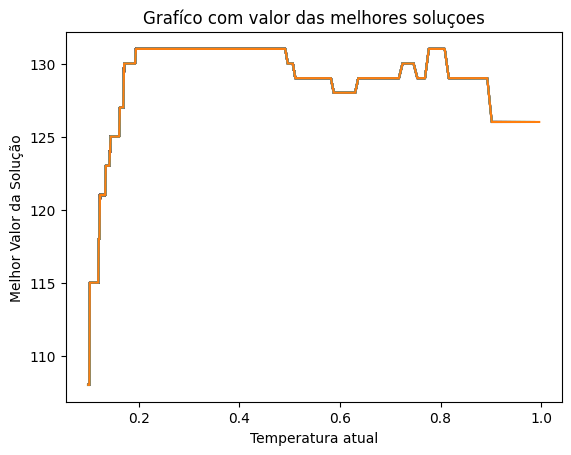

In [ ]:
resultado = simulatedAnnealing(tempInicial, tempFinal, taxaResfriamento)

De forma nítida podemos perceber que quanto mais a temperatura chega perto da temperatura final, a escolha de um vizinho "ruim" acontece mais vezes, tal fato auxilia muito para que seja possível "dar 1 passo para trás para que depois seja dado 2 passos pra frente".



